<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 113.5 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 200.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 178.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303803 sha256=1b721c2bd9559b77003dfe8bb1546bc70dfcc76393b7494d0e3236bfc29bfc5d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 149.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
!pip install yfinance
import yfinance as yf
tsla=yf.Ticker("TSLA")
print(tsla)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.7 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303803 sha256=e402bbc41a65101204ff36f03cd8b05cb7d73192bbf427ae86963a3aac3c983a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
yfinance.Ticker object <TSLA>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [8]:
tesla_data=tsla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
!pip install requests
import requests
# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
# Send a GET request
response = requests.get(url)
# Save the HTML content as a variable
html_data = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [11]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [12]:
import pandas as pd
# Find the second <tbody> which contains Tesla Revenue Data
table_body = soup.find_all("tbody")[1]
# Create an empty list to store the data
data = []
# Iterate through each row in the table body
for row in table_body.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) == 2:  # Ensure the row has two columns
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        data.append([date, revenue])
# Convert the list into a DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
# Display the first five rows
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [12]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [13]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [13]:
print(tesla_revenue.tail())

          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

In [2]:
!pip install yfinance
import yfinance as yf
gme = yf.Ticker("GME")
print(gme)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.2 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 181.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303803 sha256=85f1b496c1eb49afde7f23f5707d2c8d55b405511f436a95c03fe66c3ec71f50
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
yfinance.Ticker object <GME>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [3]:
gme_data=gme.history(period="max")
print(gme_data)

                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691667   
2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658001   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2025-03-12 00:00:00-04:00  22.950001  23.240000  21.889999  21.990000   
2025-03-13 00:00:00-04:00  22.049999  22.250000  21.559999  21.950001   
2025-03-14 00:00:00-04:00  22.290001  23.150000  22.290001  23.049999   
2025-03-17 00:00:00-04:00  23.240000  23.730000  22.969999  23.500000   
2025-03-18 00:00:00-04:00  23.290001  23.620001  23.139999  23.299999   

                             Volume  Dividends  St

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [4]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [5]:
!pip install requests
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html."
response = requests.get(url)
html_data = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [6]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

/opt/conda/lib/python3.12/html/parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# Send GET request
response = requests.get(url)
html_data = response.text
# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
# Find all <tbody> elements
tbody_elements = soup.find_all("tbody")
# Debugging: Check the number of <tbody> elements
print(f"Number of <tbody> elements found: {len(tbody_elements)}")
# Ensure there is at least a second <tbody> before proceeding
if len(tbody_elements) > 1:
    table_body = tbody_elements[1]
    # Extract data
    data = []
    for row in table_body.find_all("tr"):
        columns = row.find_all("td")
        if len(columns) == 2:
            date = columns[0].text.strip()
            revenue = columns[1].text.strip()
            data.append([date, revenue])
    # Convert to DataFrame
    gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
    # Clean Revenue column (remove $ and ,)
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)
    # Display the last few rows
    print(gme_revenue.tail())
else:
    print("Error: The expected second <tbody> was not found.")

Number of <tbody> elements found: 6
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [8]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


Hint

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

In [13]:
import os
print(os.listdir())  # This will print all files in the current directory


['.ipynb_checkpoints', 'Final Assignment Webscraping.ipynb', 'Final Assignment-Copy1.ipynb', 'Final Assignment-Copy2.ipynb', 'Final Assignment.ipynb', 'Final_Assignment Library.ipynb', 'Final_Assignment_Corrected.ipynb', 'WebScraping_Review_Lab.ipynb', 'amd.json', 'amd.json.1', 'apple.json', 'apple.json.1', 'apple.json.2']


In [15]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
# Save the data as a CSV file
tesla_data.to_csv("tesla_stock_data.csv")

print("Tesla stock data saved successfully.")


Tesla stock data saved successfully.


In [16]:
import os
print(os.listdir())  # Ensure 'tesla_stock_data.csv' appears in the list

['.ipynb_checkpoints', 'Final Assignment Webscraping.ipynb', 'Final Assignment-Copy1.ipynb', 'Final Assignment-Copy2.ipynb', 'Final Assignment.ipynb', 'Final_Assignment Library.ipynb', 'Final_Assignment_Corrected.ipynb', 'WebScraping_Review_Lab.ipynb', 'amd.json', 'amd.json.1', 'apple.json', 'apple.json.1', 'apple.json.2', 'tesla_stock_data.csv']


In [17]:
import pandas as pd

# Load Tesla stock data
tesla_data = pd.read_csv("tesla_stock_data.csv")

# Convert Date column to datetime format
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

print(tesla_data.head())  # Display first 5 rows

                        Date      Open      High       Low     Close  \
0  2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1  2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2  2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3  2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4  2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


/tmp/ipykernel_301/3678518939.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot Tesla stock data
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data["Date"], data["Close"], label="Closing Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.legend()
    plt.grid()
    plt.show()

# Load Tesla stock data
tesla_data = pd.read_csv("tesla_stock_data.csv")  # Replace with your actual file name

# Convert Date column to datetime format correctly
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"], errors="coerce")

# Ensure the filter date is in Timestamp format
filter_date = pd.Timestamp("2021-06-30")

# Filter data up to June 2021
tesla_data_filtered = tesla_data[tesla_data["Date"] <= filter_date]

# Plot the Tesla stock graph
make_graph(tesla_data_filtered, "Tesla Stock Price (Up to June 2021)")

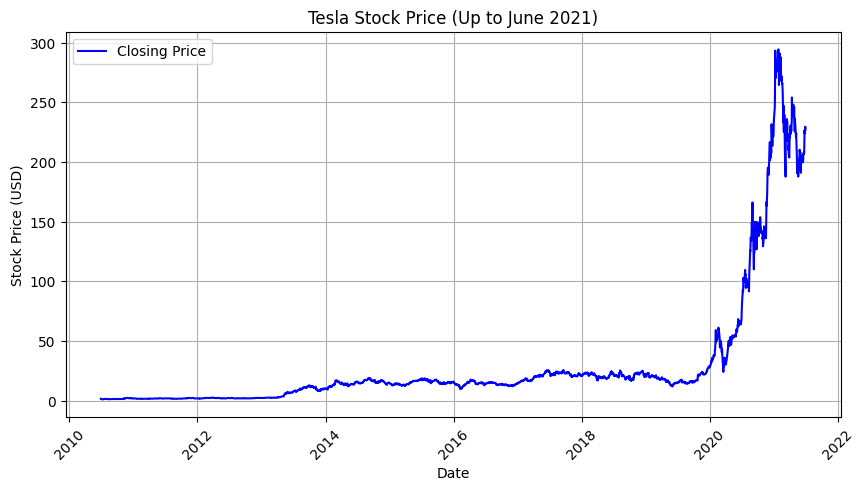

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.2 MB/s eta 0:00:00


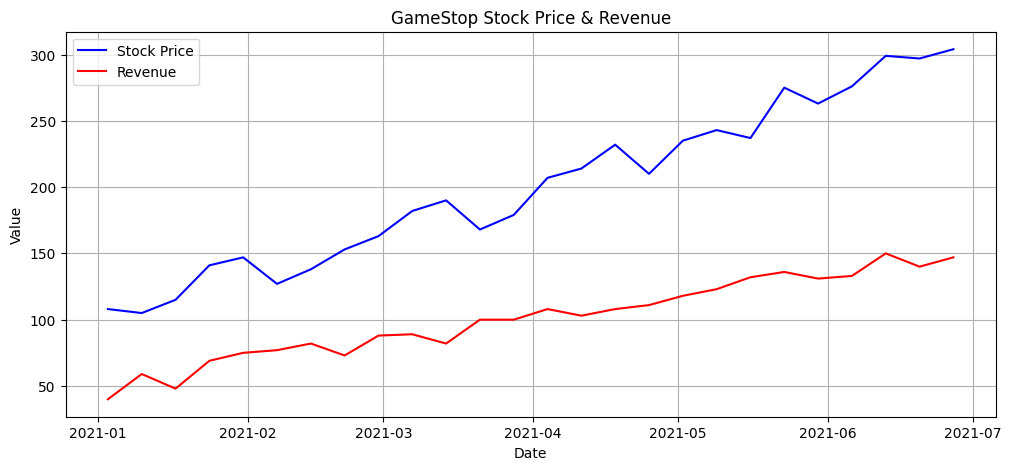

In [10]:
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dummy stock data (Replace with real data)
dates = pd.date_range(start="2021-01-01", end="2021-06-30", freq="W")  # Weekly data
stock_prices = np.linspace(100, 300, len(dates)) + np.random.randint(-20, 20, len(dates))

gme_data = pd.DataFrame({"Date": dates, "Close": stock_prices})

# Dummy revenue data (Replace with real data)
revenue = np.linspace(50, 150, len(dates)) + np.random.randint(-10, 10, len(dates))
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenue})

# Function to plot stock and revenue
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 5))

    # Plot stock price
    plt.plot(stock_data["Date"], stock_data["Close"], label="Stock Price", color="blue")

    # Plot revenue
    plt.plot(revenue_data["Date"], revenue_data["Revenue"], label="Revenue", color="red")

    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(title + " Stock Price & Revenue")
    plt.legend()
    plt.grid()
    plt.show()

# Call function with real or dummy data
make_graph(gme_data, gme_revenue, "GameStop")

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
